Array Factor
====
Last update: 7 July 2018

In an antenna array (a set of multiple identical antennas which work together as a single antenna), the directivity of the entire array is the multiplicative sum of the individual antenna's directivity function with a mathematical expression known as the array factor {\displaystyle AF} {\displaystyle AF}, which typically depends on the location, the excitation and the phase of each antenna element.  




Code to display the array factor for planar phased array.  
https://github.com/zinka/arraytool  

review equations here:  
http://www.antenna-theory.com/arrays/weights/twoDuniform.php  

## plans
- write code to follow some of the antenna theory web page equations, Antenna array basics.ipynb
- write code to generate 4pi phased array antenna patterns for T_ant calculations, CBITS array.ipynb
- need to get antenna pattern for a single patch

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [24]:
m = 14 # number of elements along x axis
n = 10 # number of elements along y axis
d = 1/2 # spacing between points
x = np.ones(m*n)
y = np.ones(m*n)
print('number of elements = {:d}'.format(m*n))

number of elements = 140


In [25]:
# generate coordinate points for hexagonal pattern
for j in range(n):
    for i in range(m):
        if j%2:
            x[i+m*j] = i*d + d/2
        else:
            x[i+m*j] = i*d
        y[i+m*j] = j*d*np.sqrt(3)/2

In [3]:
# generate coordinate points for rectangular pattern
for j in range(n):
    for i in range(m):
        x[i+m*j] = i*d
        y[i+m*j] = j*d

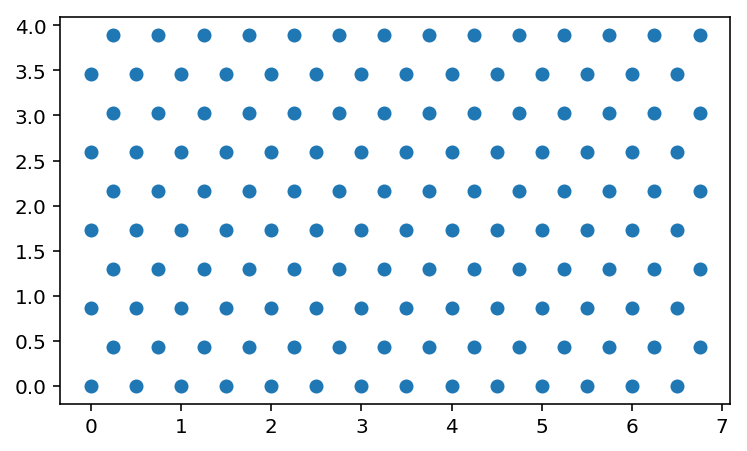

In [26]:
fig, ax = plt.subplots()
ax.set_aspect('equal', 'box')
plt.plot(x,y,'o')
plt.show()

In [27]:
# set the element weights
A = np.ones((n,m)) # Uniform planar excitation

In [28]:
# center the array in coordinat system
[x1, y1] = np.mgrid[0:m, 0:n]
x1 = (x - x[m-1]/2).T
y1 = (y - y[-1]/2).T

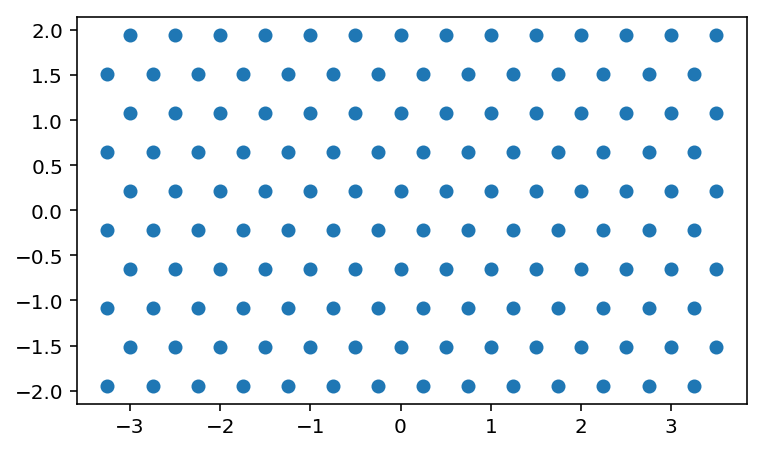

In [29]:
fig, ax = plt.subplots()
ax.set_aspect('equal', 'box')
plt.plot(x1,y1,'o')
plt.show()

# Calculate array factor
see Antennas, by Blake, pages 209 to 210

In [30]:
# set scan direction
Td = 0*np.pi/180 # scan angle in theta direction
Pd = 0*np.pi/180 # scan anglein phi direction
Wnx = np.exp(1j*2*np.pi*np.sin(Td)*np.cos(Td)*x1)
Wny = np.exp(1j*2*np.pi*np.sin(Td)*np.sin(Pd)*y1)

In [31]:
# make variables theta and phi, need to convert to radians before any math
step = 2  # step size for various ranges
theta = np.arange(-90,91,step) # 0 to 180 degrees, include end points
phi = np.arange(0,360,step) # 0 to 359 degrees

AF = np.zeros((len(theta),len(phi)),dtype=complex)
for i in range(len(theta)):
    for j in range(len(phi)):
        s1 = np.sum(Wnx*np.exp(-1j*2*np.pi*x1*np.sin(theta[i]*np.pi/180)*np.cos(phi[j]*np.pi/180)))
        s2 = np.sum(Wny*np.exp(-1j*2*np.pi*y1*np.sin(theta[i]*np.pi/180)*np.sin(phi[j]*np.pi/180)))
        AF[i,j] = s1*s2

# Plot array factor

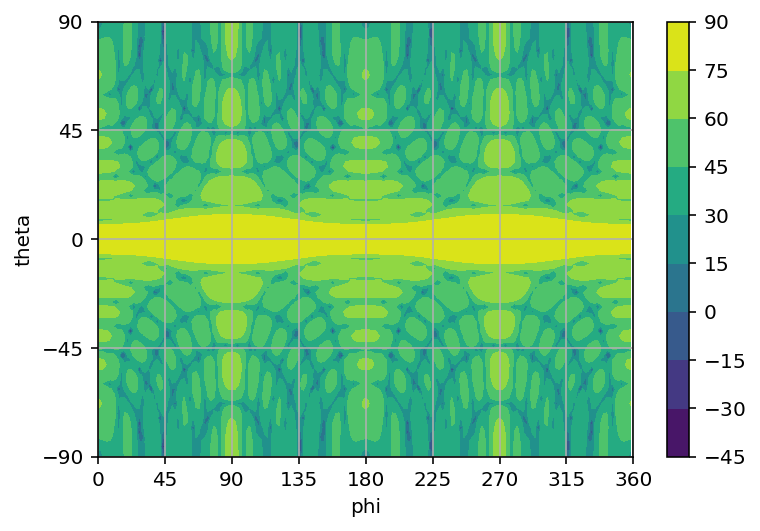

In [32]:
# set limits for plot
dB_limit = -40
F = 20*np.log10(abs(AF)) # convert to dB magnitude
msk1 = F < dB_limit
fill = msk1 * dB_limit
msk2 = F >= dB_limit
F_plt = F * (msk2) + fill

X1, Y1 = np.meshgrid(phi, theta)

plt.contourf(X1,Y1,F_plt,10)
ax.set_aspect('equal', 'box')
plt.grid(True)
plt.xlabel('phi')
plt.ylabel('theta')
plt.ylim(-90,90)
plt.yticks(np.arange(-90, 90+1, step=45))
plt.xlim(0,360)
plt.xticks(np.arange(0, 360+1, step=45))
plt.colorbar(format='$%.0f$')
plt.show()

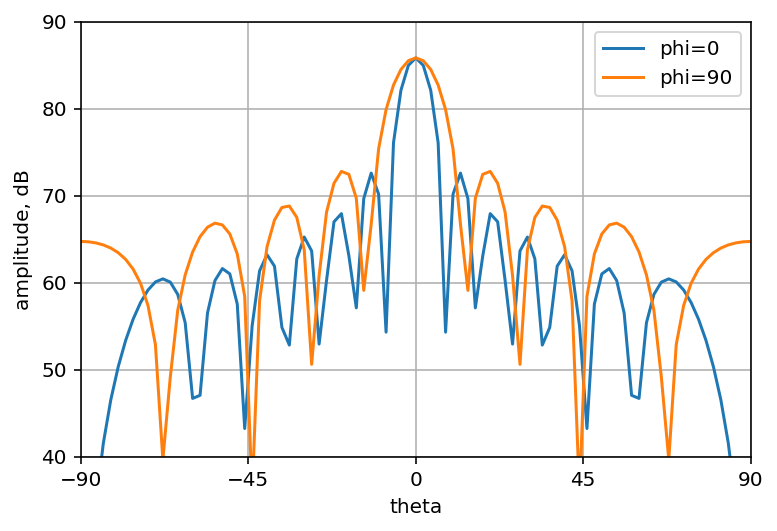

In [33]:
# plotting principle plane cuts
plt.plot(theta,20*np.log10(np.absolute(AF[:,0])),label='phi=0')
plt.plot(theta,20*np.log10(np.absolute(AF[:,45])),label='phi=90')
plt.grid(True)
plt.legend()
plt.xlabel('theta')
plt.ylabel('amplitude, dB')
plt.ylim(40,90)
plt.xlim(-90,90)
plt.xticks(np.arange(-90, 90+1, step=45))
plt.show()

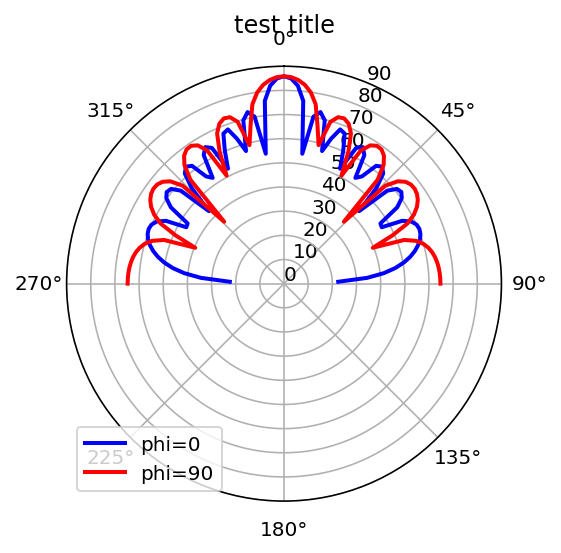

In [34]:
# plot data in polar format
# The 111 specifies 1 row, 1 column on subplot #1
ax = plt.subplot(111, polar=True)
ax.grid(True)
minGrid = 0 #set plot grid
maxGrid = 100
gridSpacing = 10
ax.set_yticks(np.arange(minGrid,maxGrid,gridSpacing))
ax.set_theta_zero_location("N")
ax.set_theta_direction(-1)
ax.autoscale(enable=False)

# Polar plot
ax.plot(theta*np.pi/180,20*np.log10(np.absolute(AF[:,0])),'b',linewidth = 2,label='phi=0')
ax.plot(theta*np.pi/180,20*np.log10(np.absolute(AF[:,45])),'r',linewidth = 2,label='phi=90')

# Setting the graph title & legend
ax.set_title("test title")
plt.legend()
plt.show()

# Export array factor

In [35]:
import pickle

In [36]:
pickle.dump(AF, open( "AF.pkl", "wb" ))

In [114]:
AF.shape

(91, 180)

# code from Matlab site
https://www.mathworks.com/matlabcentral/fileexchange/49690-array-factor-beampattern-of-discrete-array-of-any-shape  

also see:  
https://www.mathworks.com/help/antenna/analysis.html  

# extracting essential lines of code from Arraytool function pattern_uv

In [10]:
#array_ip
u_scan = 15*3.14/180 # set to +15 for a test
v_scan = 15*3.14/18
u_min = -2
u_max = 2
u_num = 300
v_min = -2
v_max = 2
v_num = 300
#scale = "dB"
dB_limit = -40
#factor= "NF"
#plot_type = "contour"
#mayavi_app = False

In [31]:
# Finally, arranging all the data into 'Arraytool' input format
x = np.reshape(x1, (M * N, -1))
y = np.reshape(y1, (M * N, -1))
z = np.zeros_like(x) # because only planar arrays are permitted here
A = np.reshape(A, (M * N, -1))
array_ip = np.hstack((x, y, z, A))  # finally, 'Arraytool' input format

In [32]:
x.shape

(25, 1)

In [13]:
y.shape

(25, 1)

In [14]:
z.shape

(25, 1)

In [15]:
A.shape

(25, 1)

In [33]:
array_ip.shape

(25, 4)

In [17]:
x

array([[-2. ],
       [-1. ],
       [ 0. ],
       [ 1. ],
       [ 2. ],
       [-1.5],
       [-0.5],
       [ 0.5],
       [ 1.5],
       [ 2.5],
       [-2. ],
       [-1. ],
       [ 0. ],
       [ 1. ],
       [ 2. ],
       [-1.5],
       [-0.5],
       [ 0.5],
       [ 1.5],
       [ 2.5],
       [-2. ],
       [-1. ],
       [ 0. ],
       [ 1. ],
       [ 2. ]])

In [34]:
x = array_ip[:, 0]
y = array_ip[:, 1]
z = array_ip[:, 2]
A = array_ip[:, 3] # un-packing "array_ip" finished

k = 2 * np.pi # (angular) wave-number, which is 2*pi when lambda = 1
u_numj = complex(0, u_num)
v_numj = complex(0, v_num)

In [35]:
A.shape

(25,)

In [36]:
x.shape

(25,)

In [37]:
x

array([-2. , -1. ,  0. ,  1. ,  2. , -1.5, -0.5,  0.5,  1.5,  2.5, -2. ,
       -1. ,  0. ,  1. ,  2. , -1.5, -0.5,  0.5,  1.5,  2.5, -2. , -1. ,
        0. ,  1. ,  2. ])

In [38]:
[u, v] = np.mgrid[u_min:u_max:u_numj, v_min:v_max:v_numj]
u1 = np.reshape(u, (u.size, -1))
v1 = np.reshape(v, (v.size, -1))

A = np.reshape(A, (len(A), -1))
U = np.tile(u1 - u_scan, len(x))
V = np.tile(v1 - v_scan, len(x))
X = np.tile(x, (u.size, 1))
Y = np.tile(y, (u.size, 1))

In [47]:
u.shape

(300, 300)

In [48]:
v.shape

(300, 300)

In [23]:
u1.shape

(90000, 1)

In [24]:
v1.shape

(90000, 1)

In [25]:
A.shape

(25, 1)

In [26]:
U.shape

(90000, 25)

In [27]:
V.shape

(90000, 25)

In [39]:
X.shape

(90000, 25)

In [40]:
Y.shape

(90000, 25)

# Array factor
The Array Factor is a function of the positions of the antennas in the array and the weights used.  

If the elements are identical (antenna array made up of all the same type of antennas), and have the same physical orientation (all point or face the same direction), then the radiation (or reception) pattern for an antenna array is simply the Array Factor multiplied by the radiation pattern $R(\theta,\phi)$.

In [41]:
# Evaluating array-factor of the planar array
AF1 = np.dot(np.exp(1j * k * (U * X + V * Y)), A)
AF = np.reshape(AF1, u.shape)

In [66]:
AF1.shape

(90000,)

In [67]:
AF.shape

(300, 300)

In [42]:
norm_fact = (abs(A)).sum()
F = AF / norm_fact

In [43]:
norm_fact

25.0

In [44]:
F = 20 * np.log10(abs(F))
# cutoff the "F" below limit for plot
msk1 = F < dB_limit
fill = msk1 * dB_limit
msk2 = F >= dB_limit
F_plt = F * (msk2) + fill

In [45]:
F_plt.shape

(300, 300)

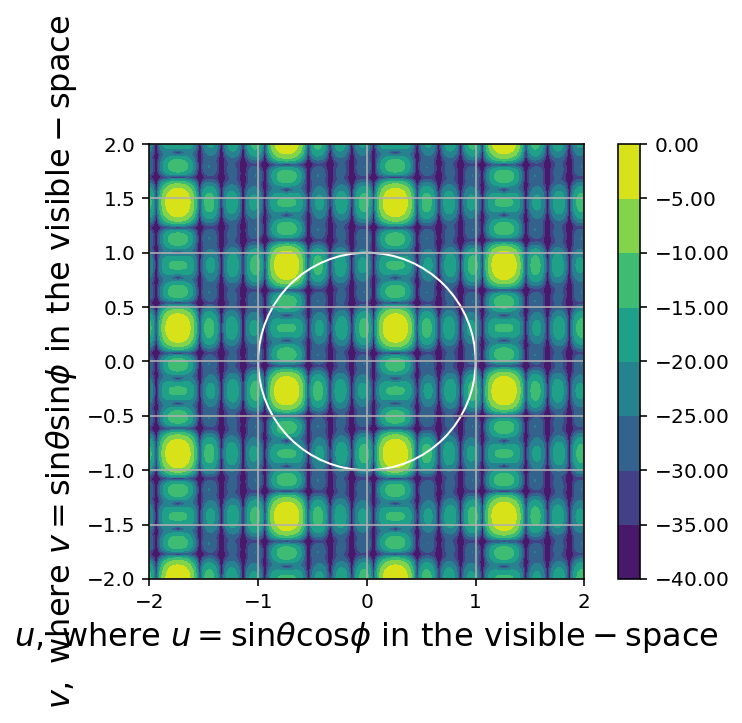

In [46]:
plt.contourf(u, v, F_plt)
vs = plt.Circle((0, 0), radius=1, edgecolor='w', fill=False)
ax = plt.gca()
ax.add_patch(vs)
plt.axis('image')
plt.grid(True)
plt.xlabel(r'$u,\ \mathrm{where}\ u=\sin \theta \cos \phi\ \mathrm{in}\ \mathrm{the}\ \mathrm{visible-space}$', fontsize=16)
plt.ylabel(r'$v,\ \mathrm{where}\ v=\sin \theta \sin \phi\ \mathrm{in}\ \mathrm{the}\ \mathrm{visible-space}$', fontsize=16)
plt.colorbar(format='$%.2f$')
plt.show()

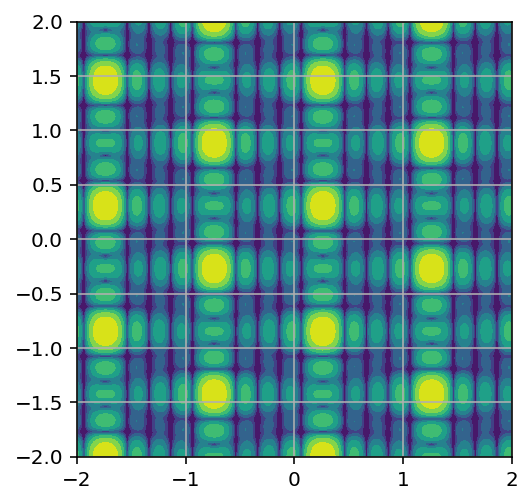

In [50]:
plt.contourf(u, v, F_plt)
#vs = plt.Circle((0, 0), radius=1, edgecolor='w', fill=False)
ax = plt.gca()
#ax.add_patch(vs)
plt.axis('image')
plt.grid(True)
#plt.xlabel(r'$u,\ \mathrm{where}\ u=\sin \theta \cos \phi\ \mathrm{in}\ \mathrm{the}\ \mathrm{visible-space}$', fontsize=16)
#plt.ylabel(r'$v,\ \mathrm{where}\ v=\sin \theta \sin \phi\ \mathrm{in}\ \mathrm{the}\ \mathrm{visible-space}$', fontsize=16)
#plt.colorbar(format='$%.2f$')
plt.show()

# Old array tool code, works